In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import time
import datetime 


In [3]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [5]:
path = '/Users/collinswestnedge/programming/Metis_Online/project_04/pickles/'

with open(path+'no_lemma_topic_model_big.pickle', 'rb') as file:
    reg_nmf = pickle.load(file)
    reg_doc_topic = pickle.load(file)
    reg_word_vec = pickle.load(file)
    reg_vectorizer = pickle.load(file)
    
    
with open(path+'lemma_topic_model_big.pickle', 'rb') as file:
    nmf_lemma = pickle.load(file)
    doc_topic_lemma = pickle.load(file)
    word_vec_lemma = pickle.load(file)
    vectorizer_lemma = pickle.load(file)
    

with open(path+'no_lemma_topic_model_big2.pickle', 'rb') as file:
    reg_nmf_large = pickle.load(file)
    reg_doc_topic_large = pickle.load(file)
    reg_word_vec_large = pickle.load(file)
    reg_vectorizer_large = pickle.load(file)
    

with open(path+'anxiety.pickle', 'rb') as file:
    anxiety_nmf = pickle.load(file)
    anxiety_doc_topic = pickle.load(file)
    anxiety_word_vec = pickle.load(file)
    anxiety_reg_vectorizer = pickle.load(file)

In [48]:
display_topics(reg_nmf, reg_doc_topic.get_feature_names(), 100)



Topic  0
hard, trying, mind, head, world, sure, real, family, having, problems, matter, kind, constantly, hope, times, away, long, thought, making, brain, probably, believe, guess, mean, change, stuff, problem, sense, pretty, okay, looking, deal, read, remember, place, different, honestly, living, weird, hear, literally, body, moment, etc, enjoy, cause, control, fear, afraid, completely, inside, reading, idea, words, fact, happens, attention, saying, negative, gets, truly, use, music, usually, deserve, lately, comes, happiness, reality, close, guys, explain, recently, situation, angry, true, positive, nice, hurt, worth, far, face, telling, writing, thanks, fun, video, goes, human, past, extremely, share, stay, open, sort, especially, support, struggle, stuck, advice

Topic  1
need, advice, listen, scared, vent, hug, support, chat, struggling, needs, okay, hospital, parents, message, insurance, hello, professional, somebody, telling, open, guys, break, reach, situation, place, handle, 

In [7]:
display_topics(nmf_lemma, vectorizer_lemma.get_feature_names(), 100)


Topic  0
happen, mind, problem, think, hard, head, normal, sure, world, try, have, read, real, remember, mean, kind, amp, long, hear, feel, write, experience, look, change, moment, deal, time, brain, believe, cause, weird, stuff, hope, okay, pretty, worry, come, guess, constantly, sense, play, idea, watch, situation, different, matt, probably, struggle, enjoy, know, sound, place, realize, memory, fear, make, control, game, voice, question, listen, share, explain, completely, wonder, etc, video, usually, act, family, live, recently, thank, forget, face, body, get, past, learn, negative, big, conversation, want, see, say, music, away, lately, word, sort, help, fact, give, dream, interest, relate, reality, post, suffer, notice

Topic  1
not, have, will, scare, mind, stuff, parent, suicidal, cause, problem, worthless, everytime, cut, tho, fuck, bore, deserve, head, hard, alive, cant, annoy, handle, motivation, bother, confuse, dumb, fix, god, okay, game, matt, real, attack, pathetic, like

In [79]:
general = reg_doc_topic[:,0]
advice_support = reg_doc_topic[:,1]
work = reg_doc_topic[:,3]
school = reg_doc_topic[:,2]
sleep = reg_doc_topic[:,5]
family = reg_doc_topic[:,6]
suicide = reg_doc_topic[:,7]
meds = reg_doc_topic_large[:,-2]
# idk = reg_doc_topic[:,4]
counseling = reg_doc_topic_large[:,11]
anxiety = anxiety_doc_topic[:,12]

emotion = doc_topic_lemma[:,9]
relationship = doc_topic_lemma[:,10]
eating_disorder = doc_topic_lemma[:,-1]
# anxiety = doc_topic_anxiety[:,-1]

In [19]:
df_full_clean = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_04/data/data_full_clean.csv', lineterminator='\n',low_memory=False)

In [26]:
df_full_clean['date'] = pd.to_datetime(df_full_clean['date'])

In [505]:
cols_of_interest = ['date', 'id', 'author', 'subreddit', 'title', 'selftext']
docs = df_full_clean[cols_of_interest + ['created_utc', 'text_title']].reset_index().drop(columns=['index', 'title'])

docs['professional_advice'] = general
docs['support']= advice_support
docs['work'] = work
docs['school'] = school
docs['sleep'] = sleep
docs['family'] = family
docs['suicide'] = suicide
docs['relationships'] = relationship
docs['counseling'] = counseling
docs['panic'] = anxiety
docs ['dietary_related'] = eating_disorder
# docs['anxiety'] = anxiety

docs['max_label'] = docs.select_dtypes(include=['float64']).idxmax(axis=1)
topic_doc_df = docs.copy()

In [668]:
testing = topic_doc_df.sort_values(by=['relationships'], ascending=False)
testing.values[100]

array([Timestamp('2019-02-14 11:59:34'), 'aqmj5t', 'ghostlight1969',
       'depression',
       "I don't know what I expect people to say but right now I am going through waves of panic attacks, feeling sick, don't know what to do.  My ex and I broke up a year ago today (Valentine's Day). She broke my heart and I have spent the last 12 months dealing, for the first time in my life with depression. I thought I was getting over it late last year but then my brother became very ill, I lost my job and in January a very close family member passed away. When I am stressed or depressed, I think about the last time I was happy, and that was with my ex (though perhaps I am viewing the past through rose-tinted spectacles).  I found out that she met someone else a couple of weeks after we broke up, after she told me that she couldn't be in a relationship with anyone. Tonight, she and this prick are going to a gig that she bought tickets for before we broke up. She bought them as a birthday prese

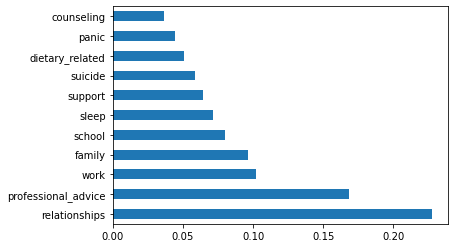

In [507]:
topic_doc_df.max_label.value_counts(normalize=True).plot(kind="barh");

In [508]:
topic_doc_df['hour'] = topic_doc_df.date.dt.hour
topic_doc_df['day'] = topic_doc_df.date.dt.day
topic_doc_df['month'] = topic_doc_df.date.dt.month
topic_doc_df['year'] = topic_doc_df.date.dt.year

pre_covid = topic_doc_df[topic_doc_df.date.dt.year == 2019]
post_covid = topic_doc_df[topic_doc_df.date.dt.year == 2020]

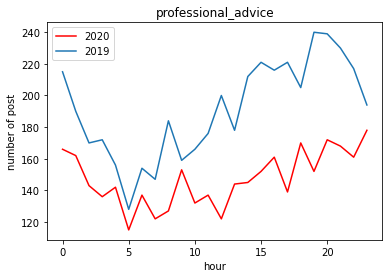

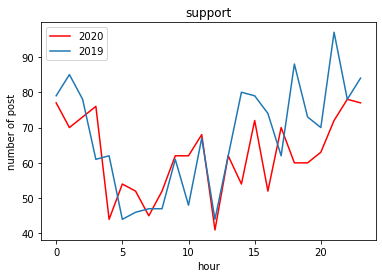

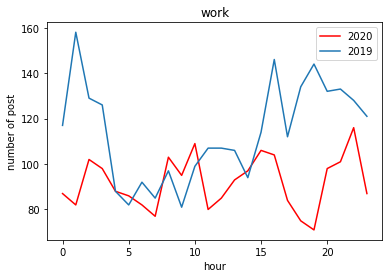

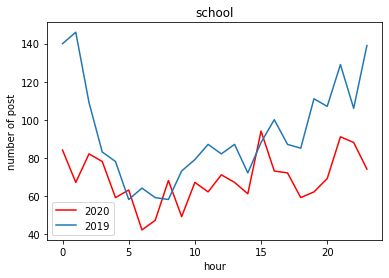

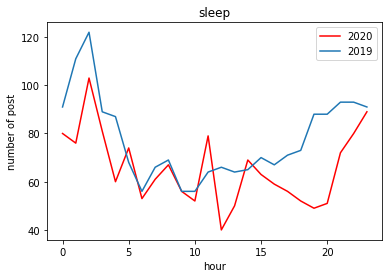

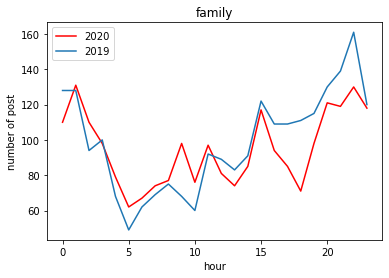

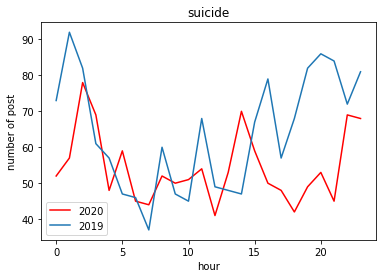

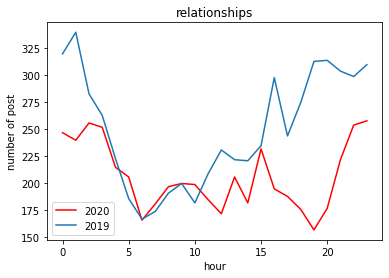

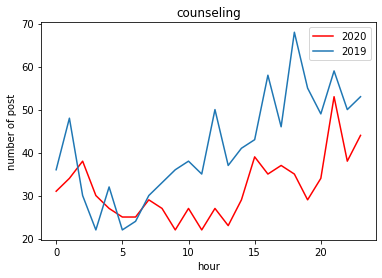

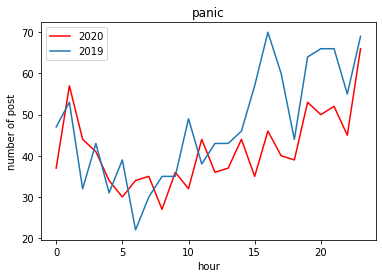

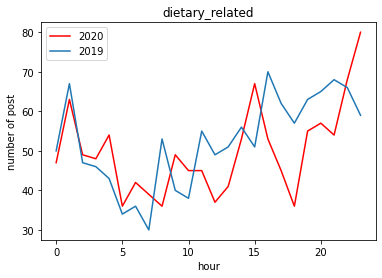

In [658]:
time_of_interest = 'hour'

a = post_covid.groupby(time_of_interest).max_label.value_counts().to_frame()
b = pre_covid.groupby(time_of_interest).max_label.value_counts().to_frame()

a.columns = ['max_label_count']
b.columns = ['max_label_count']

temp_a = a.reset_index()
temp_b = b.reset_index()

for col in topic_doc_df.select_dtypes('float').columns.to_list():
    plt.title(col)
    x = temp_a[temp_a.max_label == col][time_of_interest]
    y = temp_a[temp_a.max_label == col].max_label_count
    plt.plot(x, y, color='r')
    
    x2 = temp_b[temp_b.max_label == col][time_of_interest]
    y2 = temp_b[temp_b.max_label == col].max_label_count
    plt.plot(x2, y2)
    plt.legend(['2020', '2019'])
    plt.xlabel(time_of_interest)
    plt.ylabel('number of post')
    plt.show()

In [59]:
# time_of_interest = 'month'
# for col in topic_doc_df.select_dtypes('float').columns.to_list():
#     plt.title(col)
#     pre_covid.groupby(time_of_interest)[col].mean().plot()
#     post_covid.groupby(time_of_interest)[col].mean().plot(color='r')
#     plt.legend(['2019', '2020'])
#     plt.show()

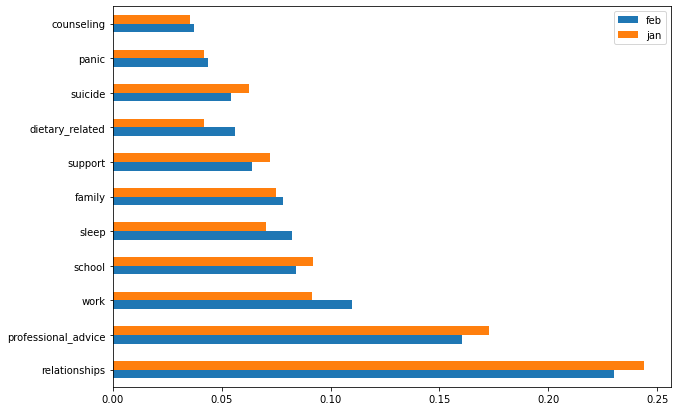

In [510]:
jan = topic_doc_df[(topic_doc_df.date.dt.month == 1) & (topic_doc_df.date.dt.year == 2020)]
feb = topic_doc_df[(topic_doc_df.date.dt.month == 2) & (topic_doc_df.date.dt.year == 2020)]

months = feb.max_label.value_counts(normalize=True).to_frame().merge(jan.max_label.value_counts(normalize=True).to_frame(), right_index=True, left_index=True)
months.columns = ['feb', 'jan']
months.plot.barh(figsize=(10,7));

# feb_means = feb.select_dtypes('float').mean().to_frame()
# jan_means = jan.select_dtypes('float').mean().to_frame()

# months = jan_means.merge(feb_means, right_index=True, left_index=True)
# months.columns = ['jan', 'feb']
# months.plot.barh(figsize=(10,7));

<AxesSubplot:ylabel='date'>

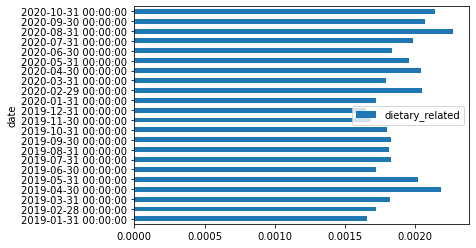

In [659]:
hey = topic_doc_df.groupby(pd.Grouper(key='date',freq='M'))[col].mean().to_frame()
hey.fillna(0).plot.barh()

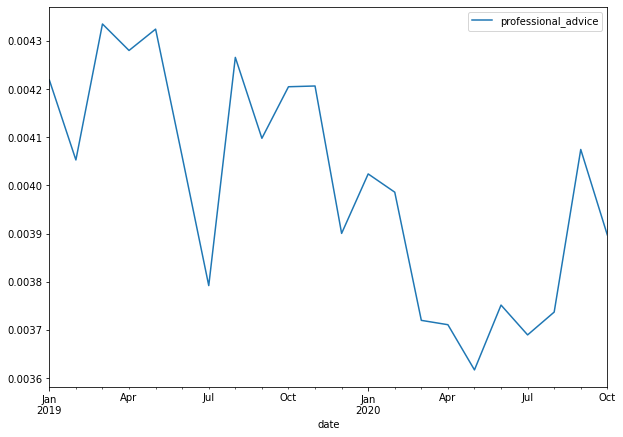

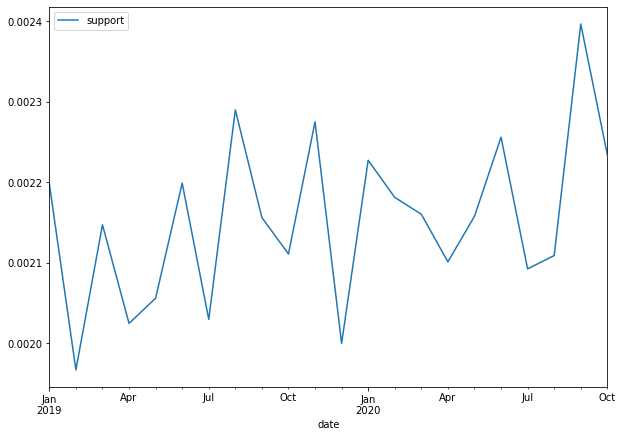

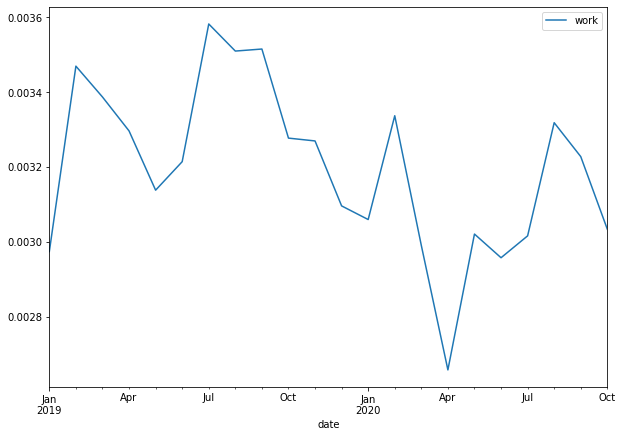

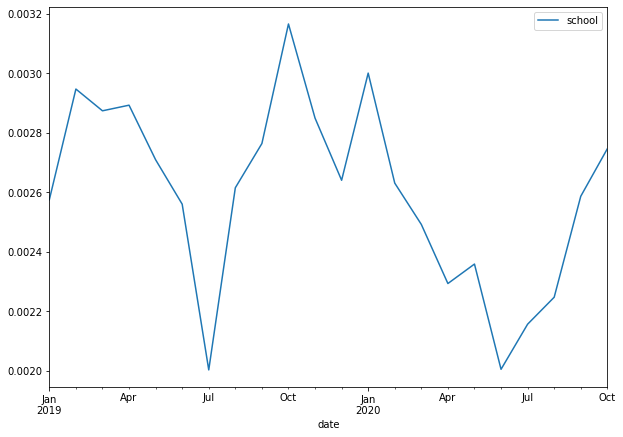

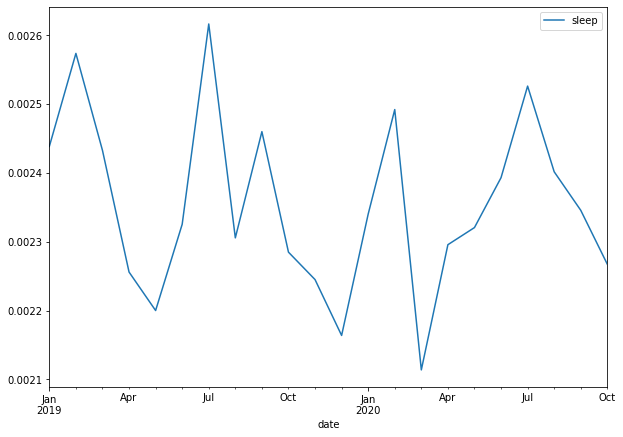

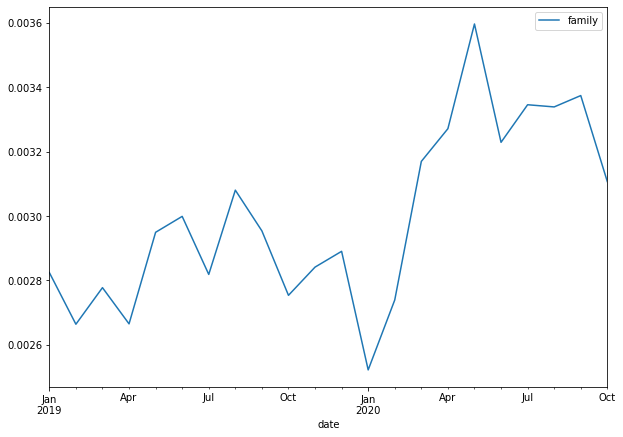

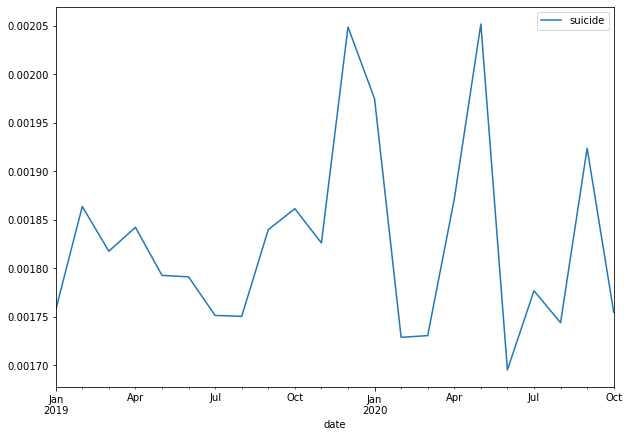

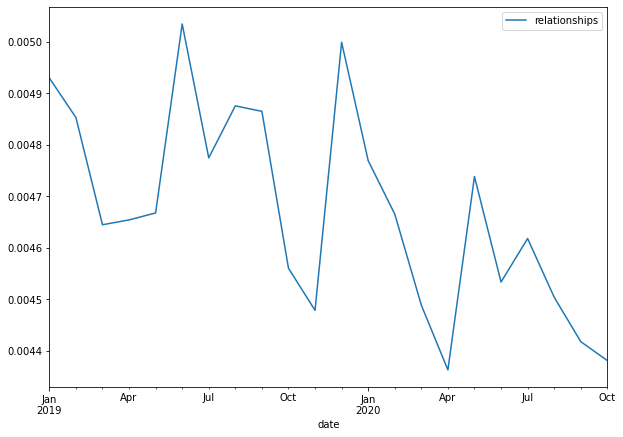

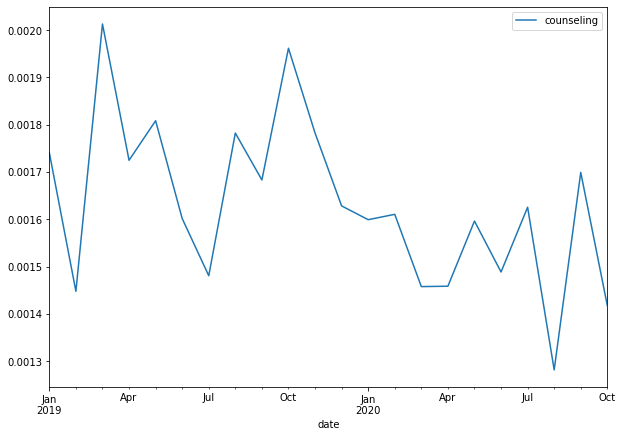

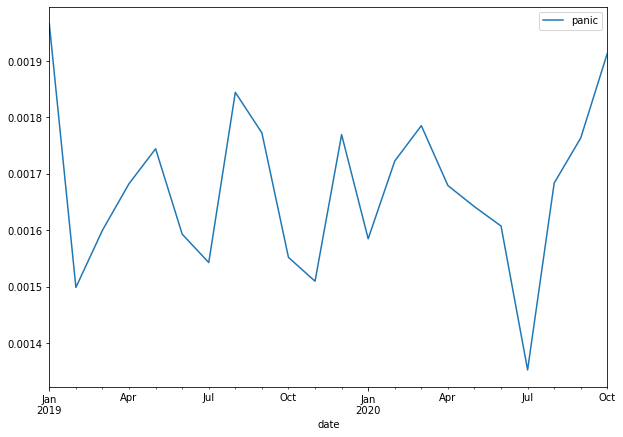

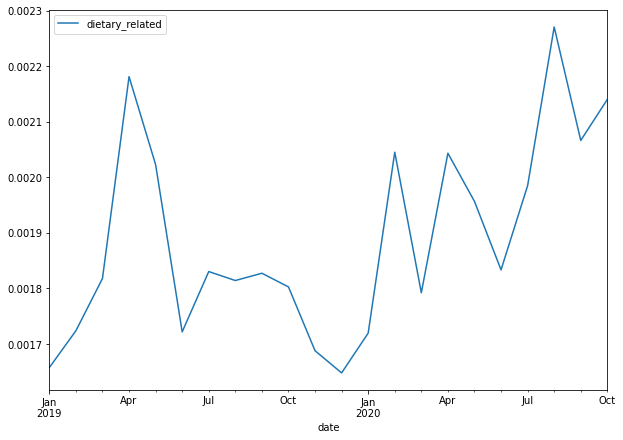

In [661]:
# topic_doc_df.groupby(topic_doc_df['date'].dt.isocalendar().week).max_label.value_counts()
freq = 'M'

for col in topic_doc_df.select_dtypes('float').columns.to_list():
    temp = topic_doc_df.groupby(pd.Grouper(key='date',freq=freq))[col].mean().to_frame()
    temp.plot(figsize=[10, 7])
    plt.show()

In [343]:
# import scattertext as st

# category = 'relationships'
# a = topic_doc_df[topic_doc_df.max_label == category].sample(1000)
# b = topic_doc_df[topic_doc_df.max_label != category].sample(1000)

# sample = pd.concat([a,b])

# nlp = spacy.load("en_core_web_sm")
# nlp.vocab[" "].is_stop = True
# nlp.vocab["like"].is_stop = True
# nlp.vocab["think"].is_stop = True
# nlp.vocab["know"].is_stop = True
# nlp.Defaults.stop_words |= set(stop_words)

# corpus = st.CorpusFromPandas(sample,
#                              category_col='max_label',
#                              text_col='text_title',
#                              nlp=nlp
#                             ).build().remove_terms(set(stop_words), ignore_absences=True)

# html = st.produce_scattertext_explorer(corpus,
#           category=category,
#           category_name=category,
#           not_category_name='not '+ category,
#           width_in_pixels=1000,
#           minimum_term_frequency=10,
#           pmi_threshold_coefficient=3,
#           metadata=None)

# open('scattertext_demo.html', 'wb').write(html.encode('utf-8'));

In [40]:
# # 	Tie-in to incorporate sckit-learn's various vectorizers into Scattertext
# from sklearn.datasets import fetch_20newsgroups
# from sklearn.feature_extraction.text import CountVectorizer
# from scattertext.CorpusFromScikit import CorpusFromScikit
# newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
# count_vectorizer = CountVectorizer()
# X_counts = count_vectorizer.fit_transform(newsgroups_train.data)

# corpus = CorpusFromScikit(
#                             X=reg_word_vec,
#                             y=test.values,
#                             feature_vocabulary=reg_vectorizer.vocabulary_,
#                             category_names=test2.values,
#                             raw_texts=topic_doc_df.selftext
#                              ).build()

# html = st.produce_scattertext_explorer(corpus,
#           category='anxiety',
#           category_name='anxiety',
#           not_category_name='not anxiety',
#           width_in_pixels=1000,
#           minimum_term_frequency=10,
#           pmi_threshold_coefficient=5,
#           metadata=None)

In [90]:
import gensim

In [281]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors

glove_file = '/Users/collinswestnedge/programming/Metis_Online/project_04/glove/glove.6B.50d.txt'
tmp_file = get_tmpfile("glove_word2vec.txt")

In [282]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_file, tmp_file)

model2 = KeyedVectors.load_word2vec_format(tmp_file)

In [767]:
model2.most_similar('self' ,topn=10)

[('kind', 0.8142042756080627),
 ('sort', 0.7901854515075684),
 ('sense', 0.7878653407096863),
 ('rather', 0.7778891324996948),
 ('own', 0.7734555602073669),
 ('means', 0.7677323818206787),
 ('merely', 0.7629954814910889),
 ('manner', 0.7601431608200073),
 ('idea', 0.7571066617965698),
 ('attitude', 0.7561382055282593)]

In [517]:
# topic_doc_df.sort_values(by=['dietary_related'], ascending=False).head(10000)

In [524]:
documents = topic_doc_df.text_title

# documents = topic_doc_df.sort_values(by=['dietary_related'], ascending=False).text_title.head(10000)
# documents = topic_doc_df[topic_doc_df.max_label == 'suicide'].text_title
tokenized_docs = [gensim.utils.simple_preprocess(d) for d in documents]

In [526]:
model = gensim.models.Word2Vec(tokenized_docs, size=400, window=5, min_count=5, sg=1)

In [775]:

# vape_words = model.wv.most_similar('vape', topn=30)
# my_words = [w[0] for w in vape_words] + ['vape']
# X = np.array([model.wv.__getitem__(word) for word in my_words])

# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca_X = pca.fit_transform(X)

# pca_df = pd.DataFrame(pca_X, columns=['component1', 'component2'])
# pca_df['words'] = my_words
# # pca_df['dist'] = np.linalg.norm(pca_df.component1-pca_df.component2)
# pca_df
# plt.figure(figsize=(10,7))
# plt.scatter(pca_X[:, 0], pca_X[:, 1], marker='_')
# for i, word in enumerate(my_words):
#     plt.annotate(word, xy=(pca_X[i, 0], pca_X[i, 1]), fontsize=14)
# plt.xlim(-2, 2.5)
# plt.ylim(-2, 2.5);

In [776]:
# from gensim.models import KeyedVectors

# # Load gensim word2vec
# # w2v_path = '<Gensim File Path>'
# w2v = gensim.models.Word2Vec(tokenized_docs, size=400, window=5, min_count=5, sg=1)

# import io

# # Vector file, `\t` seperated the vectors and `\n` seperate the words
# """
# 0.1\t0.2\t0.5\t0.9
# 0.2\t0.1\t5.0\t0.2
# 0.4\t0.1\t7.0\t0.8
# """

# path2 = '/Users/collinswestnedge/programming/Metis_Online/project_04/tensorboard_files/'

# out_v = io.open(path2+'vecs.tsv', 'w', encoding='utf-8')

# # Meta data file, `\n` seperated word
# """
# token1
# token2
# token3
# """
# out_m = io.open(path2+'meta.tsv', 'w', encoding='utf-8')

# # Write meta file and vector file
# for index in range(len(w2v.wv.index2word)):
#     word = w2v.wv.index2word[index]
#     vec = w2v.wv.vectors[index]
#     out_m.write(word + "\n")
#     out_v.write('\t'.join([str(x) for x in vec]) + "\n")
# out_v.close()
# out_m.close()